In [3]:
#!pip install qiskit

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, BasicAer, IBMQ, transpile, assemble
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity
from qiskit.tools.visualization import circuit_drawer
#from qiskit.quantum_info import state_fidelity
import numpy as np
from math import pi
from random import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#provider = IBMQ.load_account()
print("Libraries Imported Successfully!")

Libraries Imported Successfully!


# Quantum Phase Estimation

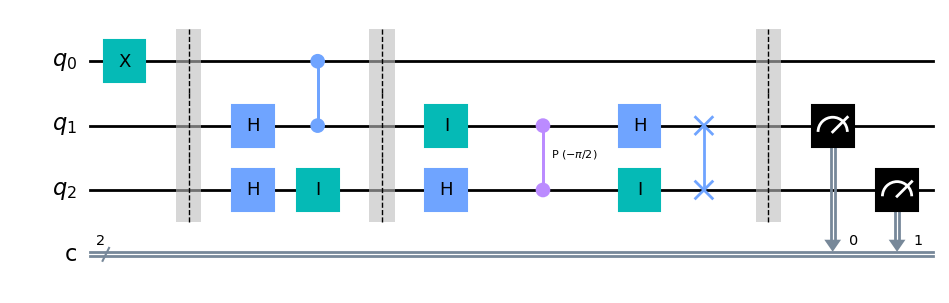

In [4]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(2,'c')
qc = QuantumCircuit(q,c)
#qc = QuantumCircuit(2,1)
qc.x(0)
qc.barrier()

qc.h(1)
qc.h(2)
qc.cz(0,1)
qc.i(2)
qc.barrier()
#QFT
qc.i(1)
qc.h(2)
qc.cp(theta = -2*pi/2**2,control_qubit=1, target_qubit=2)
qc.h(1)
qc.i(2)
qc.swap(1,2)
qc.barrier()

qc.measure([1,2],[0,1])
qc.draw('mpl')

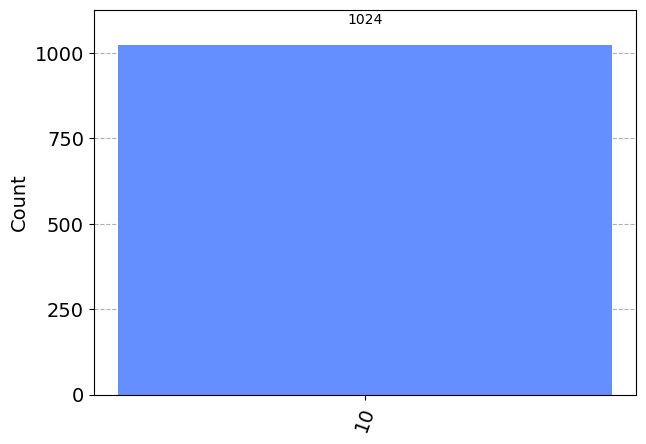

In [5]:
job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
#print(counts)
